# Predicting Median House Values

 ## Data set Attributes

 The data set contains information about houses in Boston, Massachusetts. The data set was collected by the U.S. Census Service and first published by Harrison and Rubenfeld in 1978.

 It contains the following variables:
* **crim:** per capita crime rate by town
* **zn:** proportion of residential land zoned for lots over 25,000 sq. ft
* **indus:** proportion of non-retail business acres per town
* **chas:** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* **nox:** nitric oxide concentration (parts per 10 million)
* **rm:** average number of rooms per dwelling
* **age:** proportion of owner-occupied units built prior to 1940
* **dis:** weighted distances to five boston employment centers
* **rad:** index of accessibility to radial highways
* **tax:** full-value property tax rate per \$10,000
* **ptratio:** pupil-teacher ratio by town
* **b:** 1000(bk — 0.63)², where bk is the proportion of [people of African American descent] by town
* **lstat:** percentage of lower status of the population
* **medv:** median value of owner-occupied homes in $1000s


*Harrison, David, and Daniel L. Rubinfeld, Hedonic Housing Prices and the Demand for Clean Air, Journal of Environmental Economics and Management, Volume 5, (1978), 81-102. Original data.*


 ## Objective

 The goal of this task is to analyse the relationship between these variables and build a multiple linear regression model to predict the median value based on the 'lm' and 'lstat` variables.


In [1]:
# Import relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


Read the boston.csv file into the Jupyter notebook, Capstone Linear
Regression.ipynb.

In [2]:
# Read in the data set from boston.csv
df = pd.read_csv('boston.csv')
df.head() #Check using head if data was read correctly

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Clean and prepare the data set if necessary.

In [3]:
# Clean and pre-process the data if neccessary
# Check for missing values in data set and print them to check if data needs cleaning
missing_values = df.isnull().sum()
print(missing_values)
# There are no missing values so data looks fine and does not need cleaning or replacing 
# as all are columns are showing 0 for missing values

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


Perform exploratory data analysis to gain insights into the dataset by visualising the distributions of the dependent variable and independent variables and identifying any patterns or trends in the data.

In [4]:
# Split the independent variables from the dependent variable
X = df.drop('medv',axis=1) # Assign feature variable of all variables except medv
y = df['medv'] # Assign medv as our target variable

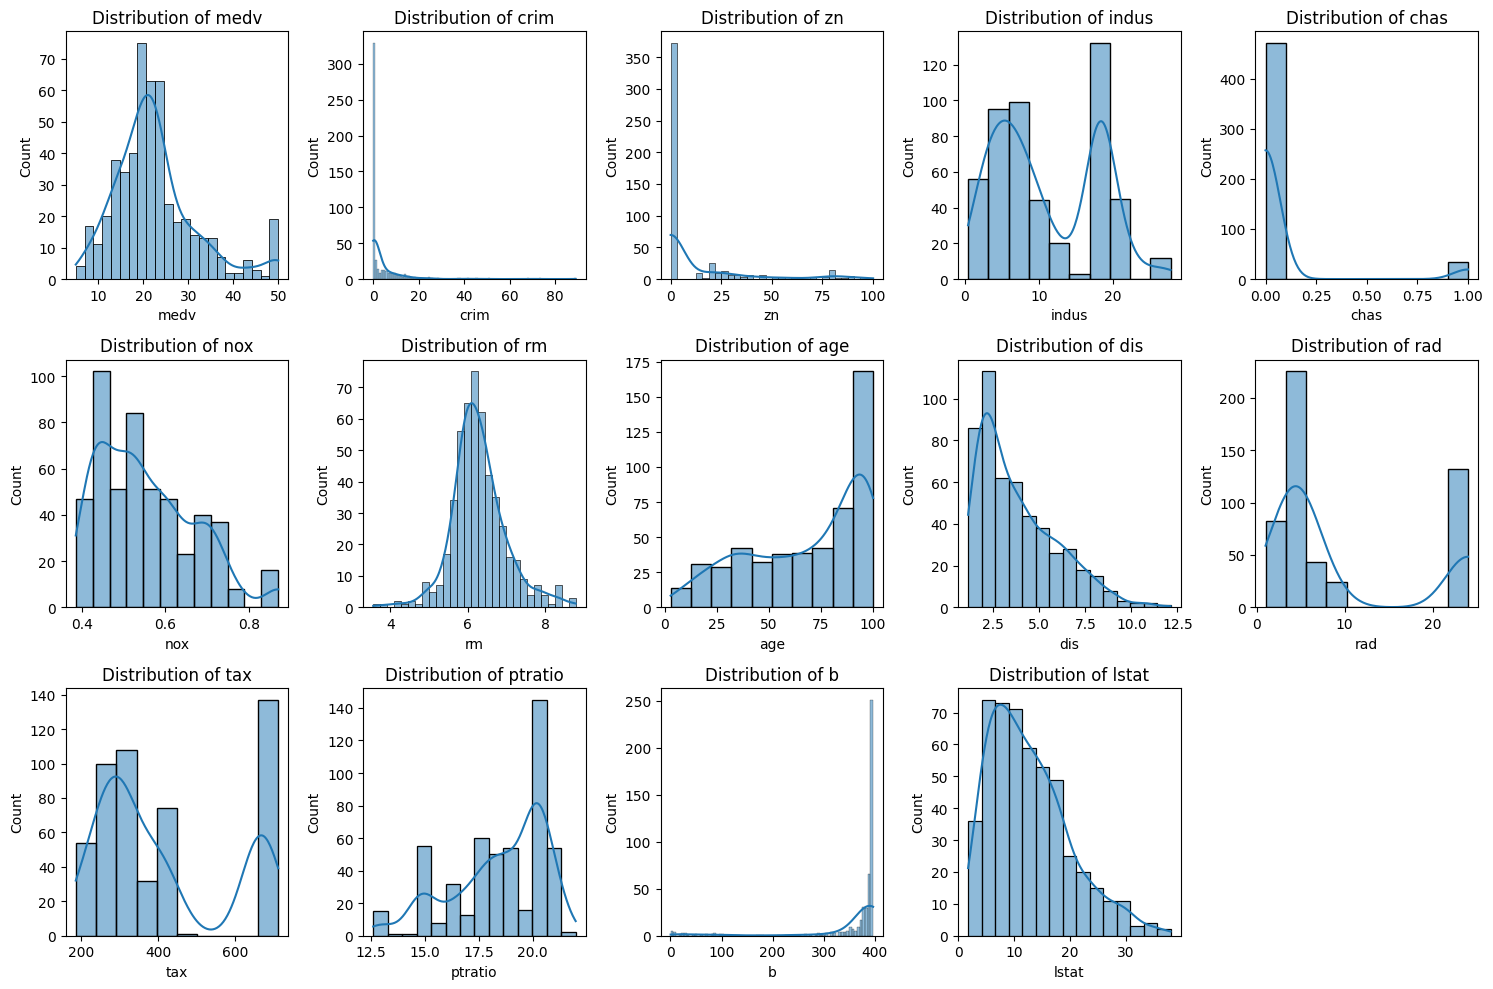

In [5]:
# Explore relationships between the independent and dependent variables 
# Perform exploratory data analysis to gain insight into dataset by visualising distribution of dependent variable
# and independent variable

# Plot figure of size 15, 10
plt.figure(figsize=(15, 10)) 

# Plot 5 plots over 3 rows each
plt.subplot(3, 5, 1) 

# Plot 'medv' first and set kde True to show the curve over the plots
sns.histplot(y, kde=True) 

# Give title to plot
plt.title('Distribution of medv')

# Loop through X which has all independent variables
for i, feature in enumerate(X.columns, start=2): 
    # Plot the histograms over 3 rows and 5 per row
    plt.subplot(3, 5, i) 

    # Plot the histplot for each feature in X and set kde True to see curve over plot
    sns.histplot(X[feature], kde=True) 

    # Give title to each plot as distribution of the feature name
    plt.title(f'Distribution of {feature}') 

# Adjust spacing between the plots    
plt.tight_layout() 

# Display the plots
plt.show()    

For the linear regression model use the following independent variables:
rm: average number of rooms
lstat: proportion of the population with a low status. 
Low status is defined as adults without a high school education who are classified as labourers

Split the dataset into the independent variables and the single dependent variable.
Generate plots to explore the relationships between the independent variables and the dependent variable. 
Split the data into training and test sets using a split ratio of 75:25

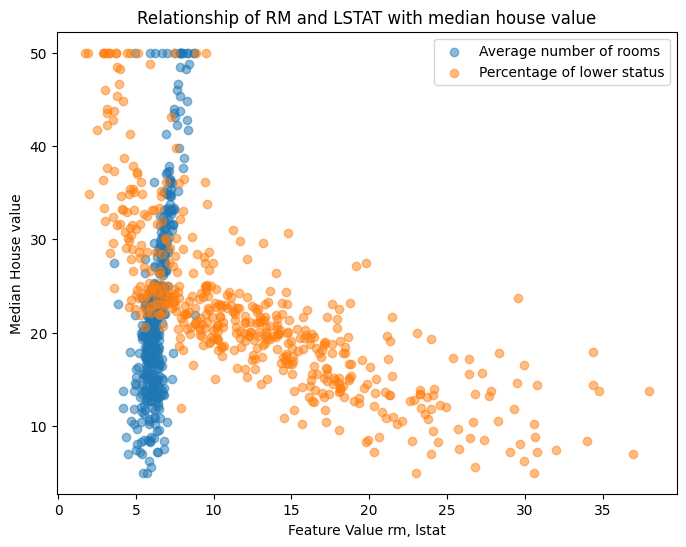

Training data:  (379, 2) (379,)
Test data:  (127, 2) (127,)


In [6]:
# Create a training and test set with a 75:25 split ratio

# Assign independent variables of rm and lstat from original dataset of independent variables X
# as we need to build our linear regression model using these two variables
# Our dependent variable still remains same as medv
X_independent = X[['rm', 'lstat']]

# Generate scatter plot using plt for independent variable rm, lstat against medv
plt.figure(figsize=(8, 6))
plt.scatter(X_independent['rm'], y, alpha=0.5, label='Average number of rooms')
plt.scatter(X_independent['lstat'], y, alpha=0.5, label='Percentage of lower status')
plt.title('Relationship of RM and LSTAT with median house value')
plt.xlabel('Feature Value rm, lstat')
plt.ylabel('Median House value')
plt.legend()
plt.show()

# Train and test data with 75:25 split ratio
rseed = 23
X_train, X_test, y_train, y_test = train_test_split(X_independent, y, test_size=0.25, random_state=rseed)

# Print training and test data
print('Training data: ',X_train.shape, y_train.shape)
print('Test data: ',X_test.shape, y_test.shape)


Build a multiple linear regression model using a training set with all the
independent variables.

In [7]:
# Build a multiple linear regression model using 'rm' and 'lstat'
boston_model = LinearRegression()
# Train the regression model
boston_model.fit(X_train, y_train)

LinearRegression()

Print out the intercept and coefficients of the trained model.

In [8]:
# Print the model intercept and coefficients
print(f'Intercept: {boston_model.intercept_}')
print(f'Coefficients: {boston_model.coef_}')

Intercept: -1.611880659994064
Coefficients: [ 5.1521073  -0.64104542]


Generate predictions for the test set

In [9]:
# Generate predictions for the test set
y_predict = boston_model.predict(X_test)

Evaluate the model's performance by computing the mean squared error (MSE) or root mean squared error (RMSE) on the test set.

In [10]:
# Evaluate the model
# Compute the mean squared error or root mean squaared error on the test set
mse = mean_squared_error(y_test, y_predict)
print(f'Mean Squared Error: {mse}')
rmse = np.sqrt(mse)
print(f'Root mean squared Error:{rmse}')

Mean Squared Error: 30.2922354566555
Root mean squared Error:5.503838247682748


Generate an error plot to visualise the differences between the predicted
and actual values in the test set.

For regression analysis we can have plots of different types. First I have done a residual plot where I have plotted the errors and comparing it with the zero error line. The zero error line helps visualise if the model is biased or if there is any patterns in the errors. Second plot I have plotted is another plot commonly plotted for regression analysis where the actual and predicted values are plotted and the error line for each value is shown to analyse the error patterns.

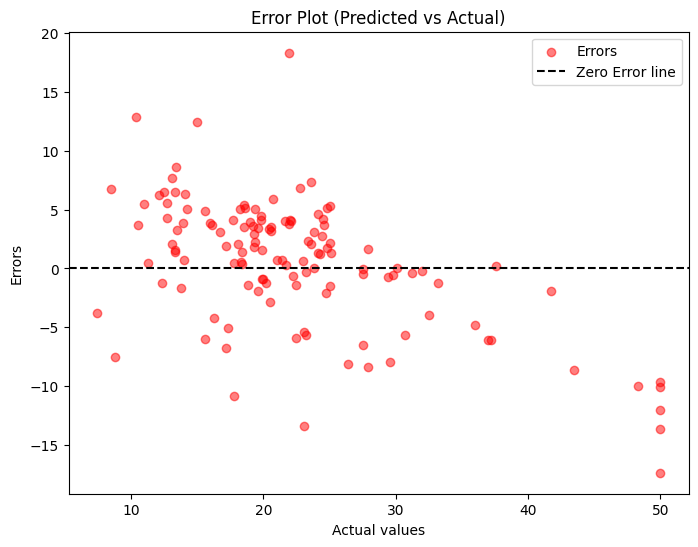

In [11]:
# Generate a plot using plt for Predicted vs Actual values to show errors
errors = y_predict - y_test
plt.figure(figsize=(8,6))
plt.scatter(y_test,errors, color='red',alpha=0.5, label = 'Errors')
plt.axhline(y=0, color='black',linestyle='--', label='Zero Error line')
plt.title('Error Plot (Predicted vs Actual)')
plt.xlabel('Actual values')
plt.ylabel('Errors')
plt.legend()
plt.show()

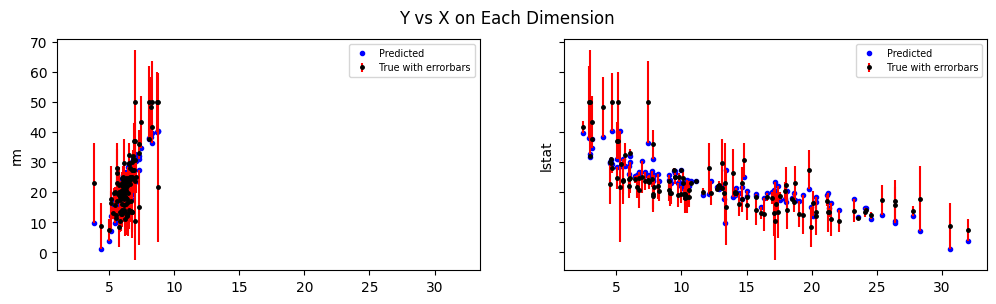

In [12]:
# Plot the errors
fig, ax = plt.subplots(1, X_test.shape[1], sharey=True, sharex=True, figsize=(12,3))
fig.suptitle("Y vs X on Each Dimension")

# Set labels as rm and lstat
ax[0].set_ylabel('rm')
ax[1].set_ylabel('lstat')

# Get values for the error bar
error_bar_values = np.abs(y_test - y_predict)

# Convert the X_test to a numpy array
X_test_np = X_test.values

# Plot data, predicted values, and error bars
for i in range(X_test.shape[1]):
    ax[i].errorbar(X_test_np[:, i], y_test, yerr=error_bar_values, fmt='.k', ecolor='red', label='True with errorbars', markersize=5)
    ax[i].scatter(X_test_np[:,i], y_predict, c='b', marker='.', label='Predicted')
    ax[i].legend(loc='best', fontsize='x-small')

Print the coefficients and interpret them within the context of the median value prediction.

In [13]:
# Print the coefficients
print(f'Intercept: {boston_model.intercept_}')
print(f'Coefficients for RM: {boston_model.coef_[0]}')
print(f'Coefficients for LSTAT: {boston_model.coef_[1]}')

Intercept: -1.611880659994064
Coefficients for RM: 5.152107299610571
Coefficients for LSTAT: -0.641045421079903


Summarise the findings from the analysis, including insights from the exploratory data analysis, model performance, and any notable observations within the notebook.

**Interpret coefficients in the context of the prediction:**  
[Answer here]:   
Co-efficient for RM is 5.152. For every one-unit increase in the average number of rooms we can expect the median house value to increase by approximately $5152(say if in $1000s) if all other variables remain constant. This indicates higher average number of rooms higher the median house value.  
Co-efficient of LSTAT is -0.641. For every one-unit increase in percentage of lower status population, we can expect the median house value to decrease by approximately $641(say if in $1000s) if all other variables remain constant. This suggests higher lower status population is associated with lower median house value.
The above analysis will hold good if assumptions of linear regression model are met and there are no non-linear relationships accounted for.  

**Summarise findings**  
[Answer here]:  
The analysis reveals several key factors in factors influencing median house values in Boston area. Our linear regression model is based on two independent variable rm and lstat against our single dependent variable medv.  
1. Explarotary data anyalysis reveals some bits about our data. The median house values(medv) raises initially and then once its peak is reached it starts climbing down showing decrease in frequency of homes with higher median value. The second curve is the curve having field average number of rooms(rm) which has a similar curve to medv climbs up initially reaches its peak and descends indicating that significant homes are larger and the fact that the curve is steeper indicates many variation in number of rooms across the dataset. In contrast Percentage of lower status population(lstat) is skewed to the left indicating a larger proportion of the population has a lower socio-economic status in the dataset. These plots indicate valuable information about the variables medv, rm and lstat.
2. Average number of rooms (rm): Higher number of rooms indicate increase in median house value which means larger spacious homes with more rooms command higher prices. This is indicated by coefficients values.  
3. Percentage of lower status population (lstat): An increase in percentage of lower status population indicates a decrease in median house value. This suggests areas with higher proportion of lower status population tend to command lower property values. This is indicated by coefficients values. 
4. Mean Squared Error (mse) and Root mean squared error(rmse):  On average, the squared differences between predicted and actual values is around 30.29. On average, the square root of these squared differences is around 5.50. So, in the context of these error metrics, a smaller value of RMSE indicates a better-performing model.
5. Error plots: From the residual plot we can see many deviations from zero error line. But we can still consider this as a reasonably low prediction as this is not a high precision field where high accuracy is essential like finance or precision engineering where a deviation in 1000s might not be acceptable. I think for house price deviation for the MSE we have can be considered on the low error levels.   
Similary, we can see in the other error sub plot where we have predicteds mapped against actual observations and the error line indicates distance deviated from true values. Though at some values the error line has deviated from actual value indicating prediction deviating the level of deviation is still less when considering the actual rmse value for a housing median value prediction. This could be considered as a low level of error suggesting model makes fairly reasonably accurate predictions.  
6. Intercept: Intercept represents the estimated value of the dependent variable when all independent variables are zero. In this context having rm or lstat as zero doesn't have a practical meaning which is why intercept does not have practical meaning in this context.   